# Load data from the allen and plot reference structures

The first cell takes a while. It needs to download data for the allen common reference framework and it takes a while to actually isolate the contours for each reference.

The references are in milimeters and in reference to a reference point, for example the approximate location of bregma. 

The following scripts are to compute new references. There are shipped by default:

|dorsal_cortex|vis_som |
|-------------|--------|
|MOB          | RSPv   |
|FRP          | RSPd   |
|MOp          | SSs    |
|MOs          | SSp-bfd|
|SSp-n        | SSp-tr |
|SSp-m        | SS-ll  |
|SSp-un       | SS-ul  |
|ACAd         | VISli  |
|RSPv         | VISp   |
|RSPd         | VISpm  |
|RSPagl       | VISl   |
|VISC         | VISal  |
|SSs          | VISrl  |
|SSp-bfd      | VISa   |
|SSp-tr       | VISam  |
|SSp-ll       | SSp-un |
|SSp-ul       | SSp-n  |
|TEa          |        |
|AUDd         |        |
|AUDp         |        |
|AUDpo        |        |
|AUDv         |        |
|VISli        |        |
|VISpor       |        |
|VISpl        |        |
|VISpm        |        |
|VISl         |        |
|VISal        |        |
|VISrl        |        |
|VISa         |        |
|VISam        |        |
|VISp         |        |

The default reference files are copied on install. This is how to generate them.

## dorsal cortex 

In [6]:
import os
import math

def get_folder_size(folder_path):
    total_size = 0
    for dirpath, dirnames, filenames in os.walk(folder_path):
        for filename in filenames:
            filepath = os.path.join(dirpath, filename)
            total_size += os.path.getsize(filepath)
    return total_size



# Convert bytes to kilobytes, megabytes, etc., for readability
def convert_bytes(size_bytes):
    if size_bytes == 0:
        return "0B"
    size_name = ("B", "KB", "MB", "GB", "TB", "PB", "EB", "ZB", "YB")
    i = int(math.floor(math.log(size_bytes, 1024)))
    p = math.pow(1024, i)
    s = round(size_bytes / p, 2)
    return "%s %s" % (s, size_name[i])



In [7]:
folder_path = annotation_dir
folder_size_bytes = get_folder_size(folder_path)
print(f"Size of folder '{folder_path}': {convert_bytes(folder_size_bytes)}")



Size of folder '/home/aeltona/.wfield': 34.68 MB


In [1]:
from wfield.allen import *

reference_name = 'dorsal_cortex'
selection = selection_dorsal_cortex
resolution = 10

# Get reference data by querying the allen Common Coordinate Framework
# # this takes a while
mask_volume, areas = allen_volume_from_structures(structures = selection,
                                                  resolution=10, 
                                                  version = 'annotation/ccf_2017')
# Save volume (not used)
# np.save(pjoin(annotation_dir,'{0}_volume.npy'.format(reference_name)),mask_volume)
# Flatten the volume to get a top view projection 
# (reference to a bregma estimate location of )
proj, ccf_regions = allen_flatten_areas(areas,mask_volume,resolution = resolution, reference= [540,570])
# get the projection outline (for masking and so)
brainoutline = projection_outline(proj, resolution,reference = [540,570])

# Save all this 
allen_save_reference(ccf_regions,proj,brainoutline,reference_name)

2024-03-27 12:39:49,997 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/annotation_10.nrrd
33it [02:28,  4.50s/it]


In [9]:
from wfield import *
# Load references
ccf_regions,proj,brain_outline = allen_load_reference('dorsal_cortex')

ccf_regions.head(10)

,acronym,name,reference,resolution,label,allen_id,allen_rgb,left_center,right_center,left_x,left_y,right_x,right_y
0,MOB,Main olfactory bulb,"[540, 570]",10,1,507,"[154, 210, 189]","[-1.0204336826, -4.2703367543]","[1.0204336826, 7.1296632457]","[-0.06, -0.065, -0.065, -0.07, -0.075, -0.075,...","[-3.265, -3.27, -3.2800000000000002, -3.285, -...","[0.06, 0.065, 0.065, 0.07, 0.075, 0.075, 0.08,...","[-3.265, -3.27, -3.2800000000000002, -3.285, -..."
1,FRP,"Frontal pole, cerebral cortex","[540, 570]",10,2,184,"[38, 143, 69]","[-0.9698151951, -3.5235934292]","[0.9698151951, 7.8764065708]","[-0.6900000000000001, -0.7000000000000001, -0....","[-3.455, -3.455, -3.455, -3.455, -3.455, -3.45...","[0.6900000000000001, 0.7000000000000001, 0.71,...","[-3.455, -3.455, -3.455, -3.455, -3.455, -3.45..."
2,MOp,Primary motor area,"[540, 570]",10,3,985,"[31, 157, 90]","[-2.1104203178, -1.0662226896]","[2.1104203178, 10.3337773104]","[-0.74, -0.75, -0.76, -0.77, -0.78, -0.79, -0....","[0.665, 0.665, 0.665, 0.665, 0.665, 0.665, 0.6...","[0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81...","[0.665, 0.665, 0.665, 0.665, 0.665, 0.665, 0.6..."
3,MOs,Secondary motor area,"[540, 570]",10,4,993,"[31, 157, 90]","[-1.1233387919, -1.8385300769000001]","[1.1233387919, 9.5614699231]","[-0.22, -0.23, -0.24, -0.25, -0.26, -0.27, -0....","[0.665, 0.665, 0.665, 0.665, 0.665, 0.665, 0.6...","[0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.2...","[0.665, 0.665, 0.665, 0.665, 0.665, 0.665, 0.6..."
4,SSp-n,"Primary somatosensory area, nose","[540, 570]",10,5,353,"[24, 128, 100]","[-3.9726763679, 0.0650291036]","[3.9726763679, 11.4650291036]","[-4.47, -4.48, -4.485, -4.485, -4.485, -4.485,...","[0.725, 0.725, 0.72, 0.71, 0.7000000000000001,...","[4.47, 4.48, 4.485, 4.485, 4.485, 4.485, 4.485...","[0.725, 0.725, 0.72, 0.71, 0.7000000000000001,..."
5,SSp-m,"Primary somatosensory area, mouth","[540, 570]",10,6,345,"[24, 128, 100]","[-3.7070809748, -0.9631218553]","[3.7070809748, 10.4368781447]","[-4.44, -4.445, -4.445, -4.445, -4.445, -4.445...","[-0.145, -0.15, -0.16, -0.17, -0.18, -0.19, -0...","[4.44, 4.445, 4.445, 4.445, 4.445, 4.445, 4.44...","[-0.145, -0.15, -0.16, -0.17, -0.18, -0.19, -0..."
6,SSp-un,"Primary somatosensory area, unassigned","[540, 570]",10,7,182305689,"[24, 128, 100]","[-3.0603176568, 0.2960726073]","[3.0603176568, 11.6960726073]","[-2.75, -2.76, -2.765, -2.765, -2.765, -2.765,...","[1.255, 1.255, 1.25, 1.24, 1.23, 1.22, 1.21, 1...","[2.75, 2.76, 2.765, 2.765, 2.765, 2.765, 2.765...","[1.255, 1.255, 1.25, 1.24, 1.23, 1.22, 1.21, 1..."
7,PL,Prelimbic area,"[540, 570]",10,8,972,"[47, 168, 80]","[-0.2877936366, -3.1709991079]","[0.2877936366, 8.2290008921]","[-0.01, -0.015, -0.015, -0.015, -0.015, -0.015...","[-2.445, -2.45, -2.46, -2.47, -2.48, -2.49, -2...","[0.01, 0.015, 0.015, 0.015, 0.015, 0.015, 0.02...","[-2.445, -2.45, -2.46, -2.47, -2.48, -2.49, -2..."
8,ACAd,"Anterior cingulate area, dorsal part","[540, 570]",10,9,39,"[64, 166, 102]","[-0.0891345566, -1.7320550459000001]","[0.0891345566, 9.6679449541]","[-0.01, -0.02, -0.03, -0.04, -0.045, -0.045, -...","[0.645, 0.645, 0.645, 0.645, 0.64, 0.63, 0.62,...","[0.01, 0.02, 0.03, 0.04, 0.045, 0.045, 0.045, ...","[0.645, 0.645, 0.645, 0.645, 0.64, 0.63, 0.62,..."
9,RSPv,"Retrosplenial area, ventral part","[540, 570]",10,10,886,"[26, 166, 152]","[-0.10775991430000001, 2.3500884244]","[0.10775991430000001, 13.7500884244]","[-0.29, -0.295, -0.295, -0.29, -0.285000000000...","[3.525, 3.52, 3.51, 3.505, 3.5, 3.49, 3.485, 3...","[0.29, 0.295, 0.295, 0.29, 0.28500000000000003...","[3.525, 3.52, 3.51, 3.505, 3.5, 3.49, 3.485, 3..."


In [8]:
from wfield import *



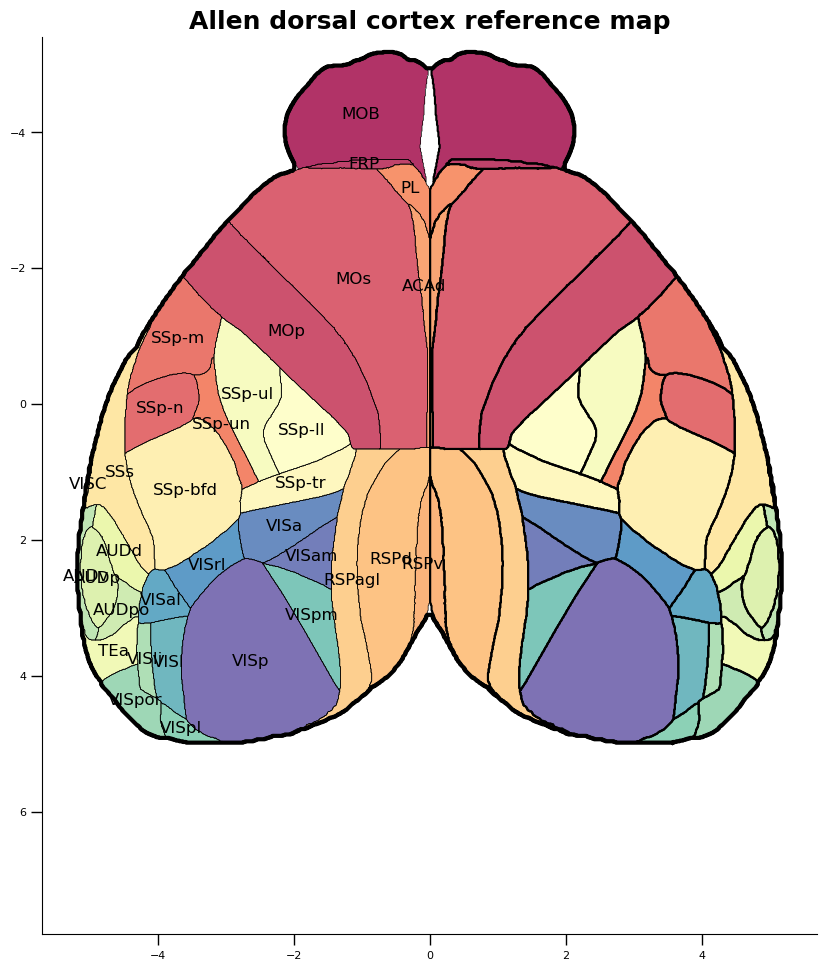

In [12]:
# Plot the reference areas
from wfield import *
ccf_regions,proj,brain_outline = allen_load_reference('dorsal_cortex')

plt.matplotlib.rcParams['pdf.fonttype'] = 42
%matplotlib inline
plt.figure(figsize=[10,12])
proj = proj.astype(np.float32)
proj[proj == 0] = np.nan
plt.imshow(proj,extent = allen_proj_extent(proj,ccf_regions),origin='lower',
           cmap = 'Spectral',alpha = 0.8)

for c in ccf_regions.iterrows():
    c = c[1]
    plt.plot(c.right_x,c.right_y,color='k')#,color=np.array(c['allen_rgb'])/255)
    plt.text(c.left_center[0],c.left_center[1],
             c.acronym,color='k',va='center',
             ha='center')
    plt.plot(c.left_x,c.left_y,'k',lw=.5)

plt.axis(allen_proj_extent(proj,ccf_regions, foraxis=True))
plt.title('Allen dorsal cortex reference map',fontsize=18);
plt.plot(brain_outline[:,0],brain_outline[:,1],'k',lw=3)
plt.savefig('allen_map.pdf')

## Posterior part of the dorsal cortex

In [13]:
from wfield.allen import *

reference_name = 'vis'
selection = selection_vis_som
resolution = 10
reference = [850,306]

# Get reference data by querying the allen Common Coordinate Framework
# # this takes a while
mask_volume, areas = allen_volume_from_structures(structures = selection,
                                                  resolution=10, 
                                                  version = 'annotation/ccf_2017')
# Save volume (not used)
# np.save(pjoin(annotation_dir,'{0}_volume.npy'.format(reference_name)),mask_volume)
# Flatten the volume to get a top view projection 
# (reference to a bregma estimate location of )
proj, ccf_regions = allen_flatten_areas(areas,mask_volume,
                                        resolution = resolution,
                                        reference= reference,
                                        gaussfilt=1)
# get the projection outline (for masking and so)
brainoutline = projection_outline(proj, 
                                  resolution,
                                  reference = reference)

# Save all this 
allen_save_reference(ccf_regions,proj,brainoutline,reference_name)

20it [01:41,  5.07s/it]


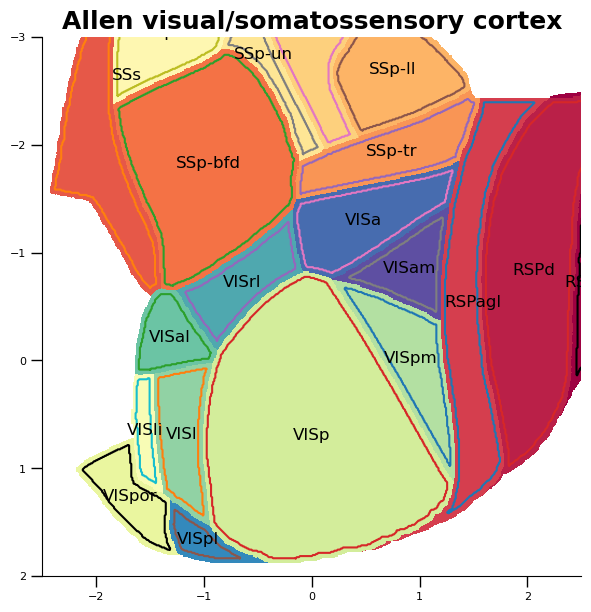

In [15]:
from wfield import *
# Load references
ccf_regions,proj,brain_outline = allen_load_reference('vis')

# Plot the reference areas
%matplotlib inline
plt.figure(figsize=[7,7])
proj = proj.astype('float32')
proj[proj == 0] = np.nan
p = proj[:,:int(proj.shape[1]/2)]
plt.imshow(p,extent = allen_proj_extent(p,ccf_regions),
           origin='lower',cmap = 'Spectral')
# plt.plot(brain_outline[:,0],brain_outline[:,1],'c',lw=3)

for c in ccf_regions.iterrows():
    c = c[1]
    plt.plot(c.left_x,c.left_y)
    plt.text(c.left_center[0],c.left_center[1],c.acronym,
             color='k',va='center',clip_on=True,
             ha='center')    #     plt.plot(c.left_x,c.left_y,'g',lw=.5)
    
plt.axis(allen_proj_extent(p,ccf_regions, foraxis=True))
plt.axis([-2.5,2.5,2,-3])
plt.title('Allen visual/somatossensory cortex',fontsize=18);